Задание 1. Вам предоставлен набор бухгалтерских данных.
1.	Провести сверку ОСВ и Главной книги. 
2.	Применить закон Бенфорда для анализа сумм проводок Главной книги. Анализ должен проводиться для эквивалента указанной суммы проводки в Евро по курсу ЦБ РФ на дату проводки. Проанализировать необходимо как все проводки целиком, так и отдельно проводки, относящиеся к исходящим платежам (на основании корреспонденции счетов). 
3.	Визуализация результатов. Полученные результаты должны быть наглядно продемонстрированы в виде отчета в Qlik Sense

### 1.Провести сверку ОСВ и Главной книги.###

In [606]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 20
pd.options.display.max_rows = 5

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Загрузим csv файл содержащий объединенную Главную книгу, который мы получили при работе с БД в MS SQL (запрос можно найти в отдельном файле - **SQLQuery_TotalGeneralLedger.sql**)

In [607]:
TotalGeneralLedger = pd.read_csv('C:\\Users\\Mell\\Desktop\\Task_1\\TotalGeneralLedger.csv', sep = ';', engine='python')

In [608]:
TotalGeneralLedger.head(3)

,Период,Регистратор_Тип,Регистратор_Номер,Регистратор_Дата,НомерСтроки,Активность,Сумма,СчетДт_Наименование,СчетДт_Код,СчетКт_Наименование,СчетКт_Код
0,2012-09-30,ПереоценкаВалютныхСредств,00000000014,30.09.2012 23:59:59,8,True,"1379945,34",NaN,NaN,Авансы поставщикам в валюте,ВАЛ.60
1,2012-09-30,ПереоценкаВалютныхСредств,00000000014,30.09.2012 23:59:59,9,True,"39098,1","Прочие расходы (по деятельности, не облагаемой...",91.02.1,Расчеты с покупателями и заказчиками (в валюте),62.21
2,2013-02-10,ПереоценкаВалютныхСредств,00000000015,10.02.2013 23:59:59,1,True,"0,15",Расчеты с покупателями и заказчиками (в валюте),62.21,Прочие доходы,91.01


Также создадим датасет с оборотно-сальдовой ведомостью. 

In [609]:
TrialBalance = pd.read_csv('C:\\Users\\Mell\\Desktop\\Task_1\\TrialBalance.csv', sep = ';', engine='python')

In [610]:
TrialBalance

,Year,Счет_Код,Счет_Наименование,СуммаОборот,СуммаОборотДт,СуммаОборотКт
0,2011,14.03,Резервы под снижение стоимости готовой продукции,-124097697,0,124097697
1,2011,58.02,Долговые ценные бумаги,-280000000,0,280000000
...,...,...,...,...,...,...
347,2013,84.02,"Убыток, подлежащий покрытию",0,0,0
348,2013,94,Недостачи и потери от порчи ценностей,"3622679,41","5255350,45","1632671,04"


Для сверки ОСВ и Главной книги необходимо просуммировать ДТ и КТ Главной книги, с группировкой по кодам и году.

Произведем некоторые преобразования над типами данных

In [611]:
TotalGeneralLedger['Период'] = pd.to_datetime(TotalGeneralLedger['Период'])

In [612]:
TotalGeneralLedger['Период'] = [time.date() for time in TotalGeneralLedger['Период']]

In [613]:
TotalGeneralLedger['Сумма'] = TotalGeneralLedger['Сумма'].str.replace(',', '.').astype(float)

Выделим отдельный фрейм с Дт

In [614]:
TGL_Dt = TotalGeneralLedger[['Период','Сумма', 'СчетДт_Код']]

In [615]:
TotalGeneralLedger.loc[TotalGeneralLedger['СчетДт_Код'].isnull()]

,Период,Регистратор_Тип,Регистратор_Номер,Регистратор_Дата,НомерСтроки,Активность,Сумма,СчетДт_Наименование,СчетДт_Код,СчетКт_Наименование,СчетКт_Код
0,2012-09-30,ПереоценкаВалютныхСредств,00000000014,30.09.2012 23:59:59,8,True,1379945.34,NaN,NaN,Авансы поставщикам в валюте,ВАЛ.60
3,2013-02-10,ПереоценкаВалютныхСредств,00000000015,10.02.2013 23:59:59,2,True,2779.47,NaN,NaN,Авансы покупателей в валюте,ВАЛ.62
...,...,...,...,...,...,...,...,...,...,...,...
390038,2012-09-30,ПереоценкаВалютныхСредств,00000000014,30.09.2012 23:59:59,6,True,55.06,NaN,NaN,Авансы поставщикам в валюте,ВАЛ.60
390042,2012-09-30,ПереоценкаВалютныхСредств,00000000014,30.09.2012 23:59:59,7,True,670214.51,NaN,NaN,Авансы поставщикам в валюте,ВАЛ.60


In [616]:
TotalGeneralLedger.loc[TotalGeneralLedger['СчетКт_Код'].isnull()]

,Период,Регистратор_Тип,Регистратор_Номер,Регистратор_Дата,НомерСтроки,Активность,Сумма,СчетДт_Наименование,СчетДт_Код,СчетКт_Наименование,СчетКт_Код
6,2012-10-31,ПереоценкаВалютныхСредств,00000000015,31.10.2012 23:59:59,10,True,1859289.45,Авансы поставщикам в валюте,ВАЛ.60,NaN,NaN
9,2012-10-31,ПереоценкаВалютныхСредств,00000000015,31.10.2012 23:59:59,13,True,1914294.71,Авансы поставщикам в валюте,ВАЛ.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
389999,2012-09-30,ПереоценкаВалютныхСредств,00000000014,30.09.2012 23:59:59,24,True,28331260.62,Авансы покупателей в валюте,ВАЛ.62,NaN,NaN
390001,2012-09-30,ПереоценкаВалютныхСредств,00000000014,30.09.2012 23:59:59,26,True,3198563.73,Авансы покупателей в валюте,ВАЛ.62,NaN,NaN


In [619]:
TGL_Dt['Период'] = pd.to_datetime(TGL_Dt['Период'])
TGL_Dt['Год'] = TGL_Dt['Период'].dt.year

In [620]:
TGL_Dt = TGL_Dt.groupby(['Год','СчетДт_Код'])['Сумма'].sum().reset_index()

Выделим отдельный фрейм с Кт

In [621]:
TGL_Kt = TotalGeneralLedger[['Период','Сумма', 'СчетКт_Код']]

In [623]:
TGL_Kt['Период'] = pd.to_datetime(TGL_Kt['Период'])
TGL_Kt['Год'] = TGL_Kt['Период'].dt.year

In [624]:
TGL_Kt = TGL_Kt.groupby(['Год','СчетКт_Код'])['Сумма'].sum().reset_index()

In [625]:
TGL_Dt.columns = ['Год', 'Счет_Код', 'ОборотДт']

In [626]:
TGL_Kt.columns = ['Год', 'Счет_Код', 'ОборотКт']

In [627]:
TGL_Dt.head(4)

,Год,Счет_Код,ОборотДт
0,2011,001,9.639265e+07
1,2011,002,1.011971e+08
2,2011,007,4.519825e+04
3,2011,008,2.538892e+08


In [628]:
TGL_Kt.head(4)

,Год,Счет_Код,ОборотКт
0,2011,000,0.000000e+00
1,2011,001,1.096572e+07
2,2011,002,6.090103e+07
3,2011,008,4.759698e+08


Объединим Дт и Кт

In [629]:
TGL_merge = TGL_Dt.merge(TGL_Kt, how='outer')

In [630]:
TGL_merge.columns = ['Year', 'Счет_Код', 'ОборотДт', 'ОборотКт']

Объеденим полученный фрейм с ОСВ

In [631]:
TrialBalance_test = TrialBalance.merge(TGL_merge, how='outer')

Выделим счета не вошедшие в исходную ОСВ

In [632]:
TrialBalance_for_info = TrialBalance_test.loc[TrialBalance_test['СуммаОборот'].isnull()]

In [633]:
TrialBalance_for_info

,Year,Счет_Код,Счет_Наименование,СуммаОборот,СуммаОборотДт,СуммаОборотКт,ОборотДт,ОборотКт
349,2011,001,NaN,NaN,NaN,NaN,9.639265e+07,10965715.45
350,2011,002,NaN,NaN,NaN,NaN,1.011971e+08,60901026.59
...,...,...,...,...,...,...,...,...
373,2012,76.НА,NaN,NaN,NaN,NaN,NaN,0.00
374,2013,76.НА,NaN,NaN,NaN,NaN,NaN,0.00


In [634]:
TrialBalance_test = TrialBalance_test.dropna(axis='index', how='any', subset=['СуммаОборот'])

In [635]:
TrialBalance_test['ОборотДт'].fillna(0, inplace=True)

In [636]:
TrialBalance_test['ОборотКт'].fillna(0, inplace=True)

Посчитаем сальдо по Главной книге

In [637]:
TrialBalance_test['Сумма_оборот_ГК'] = TrialBalance_test['ОборотДт'] - TrialBalance_test['ОборотКт']

In [638]:
TrialBalance_test.head(10)

,Year,Счет_Код,Счет_Наименование,СуммаОборот,СуммаОборотДт,СуммаОборотКт,ОборотДт,ОборотКт,Сумма_оборот_ГК
0,2011,14.03,Резервы под снижение стоимости готовой продукции,-124097697,0,124097697,0.00,1.240977e+08,-124097697.0
1,2011,58.02,Долговые ценные бумаги,-280000000,0,280000000,0.00,2.800000e+08,-280000000.0
...,...,...,...,...,...,...,...,...,...
8,2011,84.01,"Прибыль, подлежащая распределению",0,0,0,0.00,0.000000e+00,0.0
9,2011,86.01,Целевое финансирование из бюджета,0,"9752767,39","9752767,39",9752767.39,9.752767e+06,0.0


Теперь добавим в ОСВ три столбца в которых приведем разницу между значениями Дт, Кт, Суммы - ОСВ и Главной книги, в идеале мы должны получить 0,0,0.

In [639]:
pd.options.display.max_rows = 400

In [640]:
TrialBalance_test['СуммаОборот'] = TrialBalance_test['СуммаОборот'].str.replace(',', '.').astype(float)
TrialBalance_test['СуммаОборотДт'] = TrialBalance_test['СуммаОборотДт'].str.replace(',', '.').astype(float)
TrialBalance_test['СуммаОборотКт'] = TrialBalance_test['СуммаОборотКт'].str.replace(',', '.').astype(float)

In [641]:
TrialBalance_test['ОборотРазница'] = TrialBalance_test['СуммаОборот'] - TrialBalance_test['Сумма_оборот_ГК']
TrialBalance_test['ДтРазница'] = TrialBalance_test['СуммаОборотДт'] - TrialBalance_test['ОборотДт']
TrialBalance_test['КтРазница'] = TrialBalance_test['СуммаОборотКт'] - TrialBalance_test['ОборотКт']

In [642]:
TrialBalance_test.round({'ОборотРазница': 2, 'ДтРазница': 2, 'КтРазница' : 2})

,Year,Счет_Код,Счет_Наименование,СуммаОборот,СуммаОборотДт,СуммаОборотКт,ОборотДт,ОборотКт,Сумма_оборот_ГК,ОборотРазница,ДтРазница,КтРазница
0,2011,14.03,Резервы под снижение стоимости готовой продукции,-1.240977e+08,0.000000e+00,1.240977e+08,0.000000e+00,1.240977e+08,-1.240977e+08,0.0,0.0,0.0
1,2011,58.02,Долговые ценные бумаги,-2.800000e+08,0.000000e+00,2.800000e+08,0.000000e+00,2.800000e+08,-2.800000e+08,0.0,0.0,0.0
2,2011,62.31,Расчеты с покупателями и заказчиками (в у.е.),0.000000e+00,3.420020e+06,3.420020e+06,3.420020e+06,3.420020e+06,0.000000e+00,0.0,0.0,0.0
3,2011,66.04,Проценты по краткосрочным займам,-1.052158e+09,6.444304e+07,1.116601e+09,6.444304e+07,1.116601e+09,-1.052158e+09,0.0,0.0,-0.0
4,2011,68.22.1,"НДС, начисленный при неподтверждении 0%",1.767232e+06,3.808355e+06,2.041123e+06,3.808355e+06,2.041123e+06,1.767232e+06,0.0,0.0,0.0
5,2011,69.03.1,Федеральный фонд ОМС,-3.397923e+05,5.868413e+06,6.208205e+06,5.868413e+06,6.208205e+06,-3.397923e+05,0.0,0.0,-0.0
6,2011,75.01,Расчеты по вкладам в уставный (складочный) кап...,1.580000e+10,1.580000e+10,0.000000e+00,1.580000e+10,0.000000e+00,1.580000e+10,0.0,0.0,0.0
7,2011,76.39,Прочие расчеты с разными дебиторами и кредитор...,-5.821332e+05,0.000000e+00,5.821332e+05,0.000000e+00,5.821332e+05,-5.821332e+05,0.0,0.0,-0.0
8,2011,84.01,"Прибыль, подлежащая распределению",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
9,2011,86.01,Целевое финансирование из бюджета,0.000000e+00,9.752767e+06,9.752767e+06,9.752767e+06,9.752767e+06,0.000000e+00,0.0,0.0,0.0


**По итогам сверки ОСВ и Главной книги не обнаружено разницы в суммах оборотов Дт, Кт и сальдо.**

**В Главной книге найдены забалансовые счета (не входят в ОСВ):**

In [643]:
TrialBalance_for_info[['Year','Счет_Код','ОборотДт','ОборотКт']].loc[TrialBalance_for_info['Счет_Код'].isin(['000','001','002','003','004','005','006','007','008','009','010','011'])]

,Year,Счет_Код,ОборотДт,ОборотКт
349,2011,001,9.639265e+07,1.096572e+07
350,2011,002,1.011971e+08,6.090103e+07
351,2011,007,4.519825e+04,NaN
352,2011,008,2.538892e+08,4.759698e+08
353,2011,009,1.853168e+10,1.351143e+10
354,2011,011,7.325420e+06,7.625420e+06
358,2012,001,7.000000e+00,1.217643e+07
359,2012,002,1.498813e+07,4.701426e+07
360,2012,008,3.681372e+06,1.723127e+07
361,2012,009,1.551623e+10,1.403834e+10


**В Главной книге найдены счета налогового учета (не входят в ОСВ):**

In [644]:
TrialBalance_for_info[['Year','Счет_Код','ОборотДт','ОборотКт']].loc[TrialBalance_for_info['Счет_Код'].isin(['ВАЛ.60', 'ВАЛ.62'])]

,Year,Счет_Код,ОборотДт,ОборотКт
356,2011,ВАЛ.60,1.652387e+09,4.382077e+08
357,2011,ВАЛ.62,7.349223e+08,1.754211e+09
364,2012,ВАЛ.60,6.187613e+08,2.291698e+09
365,2012,ВАЛ.62,3.062139e+09,1.496439e+09
370,2013,ВАЛ.60,2.208514e+07,4.346922e+07
371,2013,ВАЛ.62,1.701393e+08,3.202920e+08


**Также счета по которым есть проводки с нулевыми суммами, не вошедшие в ОСВ:**

In [645]:
TrialBalance_for_info[['Year','Счет_Код','ОборотДт','ОборотКт']].loc[TrialBalance_for_info['Счет_Код'].isin(['99.02.1', '91.02.2','76.НА'])]

,Year,Счет_Код,ОборотДт,ОборотКт
355,2011,99.02.1,0.000000e+00,NaN
363,2012,99.02.1,0.000000e+00,NaN
369,2013,91.02.2,-2.955858e-12,NaN
373,2012,76.НА,NaN,0.0
374,2013,76.НА,NaN,0.0


### 2. Применить закон Бенфорда для анализа сумм проводок Главной книги. Анализ должен проводиться для эквивалента указанной суммы проводки в Евро по курсу ЦБ РФ на дату проводки. Проанализировать необходимо как все проводки целиком, так и отдельно проводки, относящиеся к исходящим платежам (на основании корреспонденции счетов). ###

Для того, чтобы конвертировать сумму проводки в Евро по курсу ЦБ РФ на дату проводки, воспользуемся базой данных по курсу валют с официального сайта ЦБ РФ - https://cbr.ru

Загрузим csv файл с курсами валют

In [646]:
exchange_rate = pd.read_csv('C:\\Users\\Mell\\Desktop\\Task_1\\exchange rate.csv', sep = ';', engine='python')

In [647]:
exchange_rate.head(5)

,nominal,data,curs,cdx
0,1,01.01.2011,"40,4876",Евро
1,1,12.01.2011,"39,6076",Евро
2,1,13.01.2011,"39,5154",Евро
3,1,14.01.2011,"39,4815",Евро
4,1,15.01.2011,"40,1264",Евро


In [648]:
exchange_rate['data'] = pd.to_datetime(exchange_rate['data'])

In [649]:
exchange_rate['curs'] = exchange_rate['curs'].str.replace(',', '.').astype(float)

In [650]:
exchange_rate['data'] = pd.to_datetime(exchange_rate['data'])

In [651]:
exchange_rate.columns = ['nominal', 'Период', 'curs', 'cdx']

In [652]:
TGL_Benford_test = TotalGeneralLedger.copy()

In [654]:
TGL_Benford_test['Период'] = pd.to_datetime(TGL_Benford_test['Период'])
TGL_Benford_test = TGL_Benford_test.merge(exchange_rate, how='left')

Заменим отсутствующие значения курса евро по последнему предыдущему дню, когда ЦБ его установил. 

In [655]:
pd.options.display.max_rows = 3

In [656]:
TGL_Benford_test = TGL_Benford_test.sort_values('Период')

In [657]:
TGL_Benford_test['curs'] = TGL_Benford_test['curs'].fillna(method='ffill')

Конвертируем сумму проводки

In [658]:
TGL_Benford_test['Сумма_вЕвро']= TGL_Benford_test['curs']*TGL_Benford_test['Сумма']

Определим с какой цифры начинается проводка и просуммируем их количество, сохранив результаты в отдельный фрейм.  

In [659]:
for i in range(0, 10):
    TGL_Benford_test[f'{i}'] = np.nan

In [660]:
TGL_Benford_test['Сумма_вЕвро_стр'] = TGL_Benford_test['Сумма_вЕвро'].astype('str')

In [661]:
for i in range(0, 10):
    TGL_Benford_test.loc[(TGL_Benford_test['Сумма_вЕвро_стр'].str.startswith(f'{i}')), f'{i}'] = 1
    TGL_Benford_test.loc[(TGL_Benford_test['Сумма_вЕвро_стр'].str.startswith(f'-{i}')), f'{i}'] = 1

In [662]:
TGL_Benford_test.head(5)

,Период,Регистратор_Тип,Регистратор_Номер,Регистратор_Дата,НомерСтроки,Активность,Сумма,СчетДт_Наименование,СчетДт_Код,СчетКт_Наименование,...,1,2,3,4,5,6,7,8,9,Сумма_вЕвро_стр
271499,2011-01-01,ТребованиеНакладная,00000000118,01.01.2011 16:37:51,6,True,119.56,"Общепроизводственные расходы (по деятельности,...",25.01,Сырье и материалы,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4840.697456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321248,2011-01-01,ПоступлениеДопРасходов,13/10/3380,01.01.2011 12:00:03,1,True,203.11,Сырье и материалы,10.01,Расчеты с поставщиками и подрядчиками,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,8223.436436


In [663]:
data = {'Первая цифра':[1,2,3,4,5,6,7,8,9]}

In [664]:
Benford_test = pd.DataFrame(data)

In [665]:
Benford_test['Количество'] = np.nan
Benford_test['Факт_распределение%'] = np.nan
Benford_test['Теор_распределение%'] = np.nan

Теоретическую вероятность для n = 1-9 определим по следующей формуле:

$$P(n) = \log _{10} (1+\frac{1}{n})$$

In [666]:
t = np.arange(1,10)

In [667]:
t = ((np.log10(1+ 1/t))*100)
t = np.round_(t, decimals = 2)

In [668]:
Benford_test['Теор_распределение%'] = t

In [669]:
for i in range(0, 10):
    Benford_test['Количество'].loc[Benford_test['Первая цифра'] == i] = TGL_Benford_test[f'{i}'].sum()

In [670]:
Benford_test['Факт_распределение%'] = (Benford_test['Количество']/Benford_test['Количество'].sum())*100
Benford_test = Benford_test.round({'Факт_распределение%': 2})

In [671]:
Benford_test

,Первая цифра,Количество,Факт_распределение%,Теор_распределение%
0,1,116378.0,30.72,30.10
...,...,...,...,...
8,9,16618.0,4.39,4.58


Для оценки соответствия фактического (рассчитанного) распределения теоретическому используем критерий χ2
(хи-квадрат), чтобы определить, подтверждается ли гипотеза экспериментом, и оценить, насколько полученное распределение
в целом соответствует теоретическому.

In [672]:
from scipy.stats import chisquare
chisquare(Benford_test['Факт_распределение%'], Benford_test['Теор_распределение%'])

Power_divergenceResult(statistic=0.06960085665312195, pvalue=0.9999999405648675)

Для подтверждения достоверности выявленных нестандартных транзакций используем Z-тест с уровнем доверительной вероятности 95%

Критическое значение Zт определим по формуле:

$$Z_{т} = ABS\left(N^{-1}\left(\frac{1-P_{d}}{2}\right)\right)\text{,}$$
$$\text{где } N^{-1} \text{— обратная функция стандартного нормального распределения;}$$
$$P_{d} \text{— доверительная вероятность.}$$

Значение для Z-теста рассчитывается следующим образом:

$$Z=\frac{|f-p|-(1/2n)}{\sqrt{\frac{p(1-p)}{n}}}\text{,}$$
$$\text{где f — фактическая частота появления цифры;
p — теоретическая вероятность появления цифры (распределение Бенфорда);}$$
$$\text{n — количество рассматриваемых цифр.}$$

Выражение **(1/2n)** является членом коррекции непрерывности и используется только тогда, когда он меньше первого члена в числителе.

In [673]:
Benford_test['Z'] = (abs(Benford_test['Факт_распределение%']/100 - Benford_test['Теор_распределение%']/100)-(1/(2*Benford_test['Количество'])))/np.sqrt((Benford_test['Теор_распределение%']/100)*(1-(Benford_test['Теор_распределение%']/100))/Benford_test['Количество'])

In [674]:
Benford_test

,Первая цифра,Количество,Факт_распределение%,Теор_распределение%,Z
0,1,116378.0,30.72,30.10,4.607913
...,...,...,...,...,...
8,9,16618.0,4.39,4.58,1.153077


Критическое Zт значение

In [675]:
from scipy.special import ndtri
Benford_test['Zт'] = (abs(ndtri((1-0.95)/2)))

In [699]:
pd.options.display.max_rows = 15
Benford_test

,Первая цифра,Количество,Факт_распределение%,Теор_распределение%,Z,Zт
0,1,116378.0,30.72,30.10,4.607913,1.959964
1,2,67041.0,17.69,17.61,0.538735,1.959964
2,3,48949.0,12.92,12.49,2.870763,1.959964
3,4,36136.0,9.54,9.69,0.955008,1.959964
4,5,29423.0,7.77,7.92,0.941979,1.959964
5,6,24711.0,6.52,6.69,1.056858,1.959964
6,7,20611.0,5.44,5.80,2.196222,1.959964
7,8,19011.0,5.02,5.12,0.609123,1.959964
8,9,16618.0,4.39,4.58,1.153077,1.959964


Как видим, цифры 1,3,7 **не проходят** Z-тест на соответствие статистической гипотезе о соответствии распределению Бенфорда.
Для наглядности построим график:

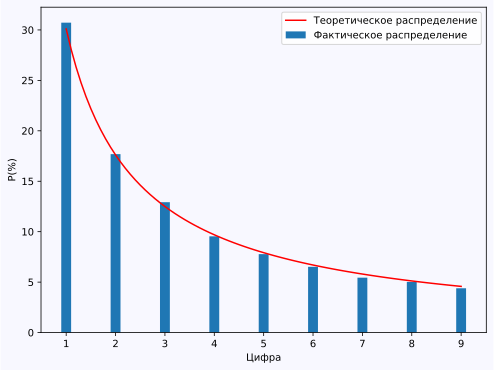

In [677]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

t_ = np.arange(1,9.1,0.1)
y_ = (np.log10(1+ 1/t_))*100


ax.bar(Benford_test['Первая цифра'], Benford_test['Факт_распределение%'], width = 0.2, label = 'Фактическое распределение')
ax.plot(t_, y_, color = 'red', label = 'Теоретическое распределение')
ax.set_facecolor('ghostwhite')
fig.set_facecolor('ghostwhite')
fig.set_figwidth(8)
fig.set_figheight(6)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.spines['top'].set_visible(True)
ax.tick_params(labeltop=False)
ax.tick_params(top=False)
plt.legend()
ax.set_xlabel('Цифра')
ax.set_ylabel('P(%)')
plt.show()


По аналогичному алгоритму проведем анализ на соответствие распределению Бенфорда только для исходящих платежей. 

In [678]:
TGL_Benford_test_2 = TGL_Benford_test.copy()

In [679]:
TGL_Benford_test_2 = TGL_Benford_test_2.dropna(axis='index', how='any', subset=['СчетКт_Код'])

In [680]:
import re
TGL_Benford_test_2 = TGL_Benford_test_2.loc[TGL_Benford_test_2['СчетКт_Код'].str.contains(r'(51.*|50.*)')]

In [681]:
TGL_Benford_test_2['СчетКт_Код'].unique()

array(['51'], dtype=object)

In [682]:
for i in range(0, 10):
    TGL_Benford_test_2[f'{i}'] = np.nan

In [683]:
TGL_Benford_test_2['Сумма_вЕвро_стр'] = TGL_Benford_test_2['Сумма_вЕвро'].astype('str')

In [684]:
for i in range(0, 10):
    TGL_Benford_test_2.loc[(TGL_Benford_test_2['Сумма_вЕвро_стр'].str.startswith(f'{i}')), f'{i}'] = 1
    TGL_Benford_test_2.loc[(TGL_Benford_test_2['Сумма_вЕвро_стр'].str.startswith(f'-{i}')), f'{i}'] = 1

In [685]:
TGL_Benford_test_2.head(3)

,Период,Регистратор_Тип,Регистратор_Номер,Регистратор_Дата,НомерСтроки,Активность,Сумма,СчетДт_Наименование,СчетДт_Код,СчетКт_Наименование,...,1,2,3,4,5,6,7,8,9,Сумма_вЕвро_стр
135681,2011-01-01,ПлатежныйОрдерСписаниеДенежныхСредств,00000000056,01.01.2011 12:00:00,1,True,78928.57,Расчетные счета,51,Расчетные счета,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3195628.370732
29324,2011-01-01,КорректировкаЗаписейРегистров,00000000026,01.01.2011 12:00:02,1,True,-84187.10,Расчеты по авансам выданным,60.02,Расчетные счета,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-3408533.62996
29322,2011-01-01,КорректировкаЗаписейРегистров,00000000022,01.01.2011 12:00:01,1,True,-15574.52,Прочие расчеты с разными дебиторами и кредиторами,76.09,Расчетные счета,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-630574.935952


In [686]:
Benford_test_2 = pd.DataFrame(data)

In [687]:
Benford_test_2['Количество'] = np.nan
Benford_test_2['Факт_распределение%'] = np.nan
Benford_test_2['Теор_распределение%'] = np.nan

In [688]:
t = np.arange(1,10)
t = ((np.log10(1+ 1/t))*100)
t = np.round_(t, decimals = 2)

In [689]:
Benford_test_2['Теор_распределение%'] = t

In [690]:
for i in range(0, 10):
    Benford_test_2['Количество'].loc[Benford_test_2['Первая цифра'] == i] = TGL_Benford_test_2[f'{i}'].sum()

In [691]:
Benford_test_2['Факт_распределение%'] = (Benford_test_2['Количество']/Benford_test_2['Количество'].sum())*100
Benford_test_2 = Benford_test_2.round({'Факт_распределение%': 2})

Хи-квадрат:

In [692]:
chisquare(Benford_test_2['Факт_распределение%'], Benford_test_2['Теор_распределение%'])

Power_divergenceResult(statistic=0.2265060135682193, pvalue=0.999993737981427)

In [693]:
Benford_test_2['Z'] = (abs(Benford_test_2['Факт_распределение%']/100 - Benford_test_2['Теор_распределение%']/100)-(1/(2*Benford_test_2['Количество'])))/np.sqrt((Benford_test_2['Теор_распределение%']/100)*(1-(Benford_test_2['Теор_распределение%']/100))/Benford_test_2['Количество'])

In [694]:
Benford_test_2['Zт'] = (abs(ndtri((1-0.95)/2)))

In [698]:
pd.options.display.max_rows = 15
Benford_test_2

,Первая цифра,Количество,Факт_распределение%,Теор_распределение%,Z,Zт
0,1,5348.0,29.60,30.10,0.782251,1.959964
1,2,3429.0,18.98,17.61,2.083724,1.959964
2,3,2304.0,12.75,12.49,0.345981,1.959964
3,4,1807.0,10.00,9.69,0.405701,1.959964
4,5,1345.0,7.44,7.92,0.601379,1.959964
5,6,1150.0,6.37,6.69,0.375319,1.959964
6,7,982.0,5.44,5.80,0.414374,1.959964
7,8,939.0,5.20,5.12,0.037193,1.959964
8,9,763.0,4.22,4.58,0.389090,1.959964


Как видим, цифра 2 **не проходит** Z-тест на соответствие статистической гипотезе о соответствии распределению Бенфорда. Для наглядности также построим график:

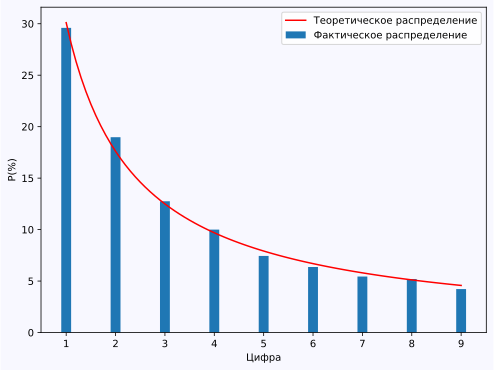

In [696]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

t_ = np.arange(1,9.1,0.1)
y_ = (np.log10(1+ 1/t_))*100


ax.bar(Benford_test_2['Первая цифра'], Benford_test_2['Факт_распределение%'], width = 0.2, label = 'Фактическое распределение')
ax.plot(t_, y_, color = 'red', label = 'Теоретическое распределение')
ax.set_facecolor('ghostwhite')
fig.set_facecolor('ghostwhite')
fig.set_figwidth(8)
fig.set_figheight(6)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.spines['top'].set_visible(True)
ax.tick_params(labeltop=False)
ax.tick_params(top=False)
plt.legend()
ax.set_xlabel('Цифра')
ax.set_ylabel('P(%)')
plt.show()

**По итогам применения закона Бенфорда для анализа сумм проводок Главной книги (в Евро) выявлено, что: необходимо детальнее проверить проводки с первыми цифрами "1,3,7", а также проводки исходящих платежей с первой цифрой "2"**